In [133]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# %% load dataset
df = pd.read_csv('listings.csv.gz', compression='gzip')
print(df.info(verbose=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url   

In [135]:
df.head(5)
df['neighborhood_overview']

0       Mostly quiet ( no loud music, no crowed sidewa...
1       The LOCATION: Roslindale is a safe and diverse...
2       Beacon Hill is a historic neighborhood filled ...
3                                                     NaN
4       Beacon Hill is located downtown and is conveni...
                              ...                        
5706                                                  NaN
5707    This furnished apartment is located in the Nor...
5708    Unique shops and cafes/ restaurants only a few...
5709                                                  NaN
5710    This furnished apartment is located in the Nor...
Name: neighborhood_overview, Length: 5711, dtype: object

In [136]:
df['host_since']

0       2008-12-03
1       2009-05-11
2       2009-07-22
3       2008-12-03
4       2009-07-22
           ...    
5706    2017-01-11
5707    2016-12-16
5708    2013-10-14
5709    2015-11-19
5710    2016-12-16
Name: host_since, Length: 5711, dtype: object

In [137]:
# %% preprocessing
# 1. time of host join Airbnb, processed to number days since first hosting in days
df_temp = (pd.to_datetime('2019-09-22') - pd.to_datetime(df['host_since'])).dt.days
df_select_X = df_temp.copy()

In [138]:
df_temp.head(5)

0    3945
1    3786
2    3714
3    3945
4    3714
Name: host_since, dtype: int64

In [139]:
df['host_response_time'].head(5)

0    within a few hours
1        within an hour
2          within a day
3    within a few hours
4          within a day
Name: host_response_time, dtype: object

In [140]:
# 2. host response time in categories, processed to 4 dummy variables
# null value exists, not included in any category
df_temp = pd.get_dummies(df[['host_response_time']], prefix='hrt')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)
print(type(df_select_X))

<class 'pandas.core.frame.DataFrame'>


In [141]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour
0,3945,0,0,1,0
1,3786,0,0,0,1
2,3714,0,1,0,0
3,3945,0,0,1,0
4,3714,0,1,0,0


In [142]:
df['host_response_rate'].head(5)

0    100%
1    100%
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object

In [143]:
# 3. host response rate in percentage, processed to float [0, 1]
# null value exists, not included in any category
df_temp = df['host_response_rate'].astype('str').map(lambda x: float(x.strip('%')) / 100)
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [144]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate
0,3945,0,0,1,0,1.0
1,3786,0,0,0,1,1.0
2,3714,0,1,0,0,1.0
3,3945,0,0,1,0,1.0
4,3714,0,1,0,0,1.0


In [145]:
# 4. whether host is superhost, processed to dummy variable 1-True 0-False
df_temp = (df['host_is_superhost'] == 't').astype('int')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [146]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost
0,3945,0,0,1,0,1.0,1
1,3786,0,0,0,1,1.0,1
2,3714,0,1,0,0,1.0,0
3,3945,0,0,1,0,1.0,1
4,3714,0,1,0,0,1.0,0


In [147]:
# 5. host listing count
df_select_X = pd.concat([df_select_X, df['host_listings_count']], axis=1)

In [148]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count
0,3945,0,0,1,0,1.0,1,5
1,3786,0,0,0,1,1.0,1,1
2,3714,0,1,0,0,1.0,0,12
3,3945,0,0,1,0,1.0,1,5
4,3714,0,1,0,0,1.0,0,12


In [149]:
# 6. whether host has profile picture, processed to dummy variable 1-True 0-False
df_temp = (df['host_has_profile_pic'] == 't').astype('int')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [150]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic
0,3945,0,0,1,0,1.0,1,5,1
1,3786,0,0,0,1,1.0,1,1,1
2,3714,0,1,0,0,1.0,0,12,1
3,3945,0,0,1,0,1.0,1,5,1
4,3714,0,1,0,0,1.0,0,12,1


In [151]:
# 7. whether host identity is verified, processed to dummy variable 1-True 0-False
df_temp = (df['host_identity_verified'] == 't').astype('int')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [152]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified
0,3945,0,0,1,0,1.0,1,5,1,0
1,3786,0,0,0,1,1.0,1,1,1,1
2,3714,0,1,0,0,1.0,0,12,1,0
3,3945,0,0,1,0,1.0,1,5,1,0
4,3714,0,1,0,0,1.0,0,12,1,0


In [153]:
# 8. host neighbourhood, processed to 26 dummy variables
df_temp = pd.get_dummies(df[['neighbourhood_cleansed']], prefix='nc')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [154]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,nc_Mattapan,nc_Mission Hill,nc_North End,nc_Roslindale,nc_Roxbury,nc_South Boston,nc_South Boston Waterfront,nc_South End,nc_West End,nc_West Roxbury
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# 9. whether host location is exact, , processed to dummy variable 1-True 0-False
df_temp = (df['is_location_exact'] == 't').astype('int')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [156]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,nc_Mission Hill,nc_North End,nc_Roslindale,nc_Roxbury,nc_South Boston,nc_South Boston Waterfront,nc_South End,nc_West End,nc_West Roxbury,is_location_exact
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,0,0,0,1


In [157]:
# 10. property_type, processed to 22 dummy variables
df_temp = pd.get_dummies(df[['property_type']], prefix='pt')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [158]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,pt_Hotel,pt_House,pt_Houseboat,pt_Loft,pt_Other,pt_Resort,pt_Serviced apartment,pt_Tent,pt_Townhouse,pt_Villa
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
# 11. room type, , processed to 4 dummy variables
df_temp = pd.get_dummies(df[['room_type']], prefix='rt')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [160]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,pt_Other,pt_Resort,pt_Serviced apartment,pt_Tent,pt_Townhouse,pt_Villa,rt_Entire home/apt,rt_Hotel room,rt_Private room,rt_Shared room
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,1,0,0,0
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,0,1,0,0,0
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,0,1,0,0,0


In [161]:
# 12. maximum number of people the property accommodates
df_select_X = pd.concat([df_select_X, df['accommodates']], axis=1)

In [162]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,pt_Resort,pt_Serviced apartment,pt_Tent,pt_Townhouse,pt_Villa,rt_Entire home/apt,rt_Hotel room,rt_Private room,rt_Shared room,accommodates
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,1,0,0,0,2
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,2
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,1,0,0,0,2
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,0,1,0,0,0,4
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,0,1,0,0,0,2


In [163]:
# 13. number of bathrooms available
df_select_X = pd.concat([df_select_X, df['bathrooms']], axis=1)

# 14. number of bedrooms available
df_select_X = pd.concat([df_select_X, df['bedrooms']], axis=1)

# 15. number of beds available
df_select_X = pd.concat([df_select_X, df['beds']], axis=1)

In [164]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,pt_Townhouse,pt_Villa,rt_Entire home/apt,rt_Hotel room,rt_Private room,rt_Shared room,accommodates,bathrooms,bedrooms,beds
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,1,0,0,0,2,1.0,1.0,1
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,0,1,0,2,1.0,1.0,1
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,1,0,0,0,2,1.0,1.0,1
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,1,0,0,0,4,2.0,2.0,2
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,1,0,0,0,2,1.0,1.0,1


In [165]:
# 16. bed type, processed to 5 dummy variables
df_temp = pd.get_dummies(df[['bed_type']], prefix='bt')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [166]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,rt_Shared room,accommodates,bathrooms,bedrooms,beds,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,2,1.0,1.0,1,0,0,0,0,1
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,2,1.0,1.0,1,0,0,0,0,1
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,2,1.0,1.0,1,0,0,0,0,1
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,4,2.0,2.0,2,0,0,0,0,1
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,2,1.0,1.0,1,0,0,0,0,1


In [167]:
# 17. price per night in dollars
df_temp = df['price'].map(lambda x: re.compile(r'[^\d.]+').sub('', str(x))).astype('float')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [168]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,accommodates,bathrooms,bedrooms,beds,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price
0,3945,0,0,1,0,1.0,1,5,1,0,...,2,1.0,1.0,1,0,0,0,0,1,125.0
1,3786,0,0,0,1,1.0,1,1,1,1,...,2,1.0,1.0,1,0,0,0,0,1,65.0
2,3714,0,1,0,0,1.0,0,12,1,0,...,2,1.0,1.0,1,0,0,0,0,1,99.0
3,3945,0,0,1,0,1.0,1,5,1,0,...,4,2.0,2.0,2,0,0,0,0,1,225.0
4,3714,0,1,0,0,1.0,0,12,1,0,...,2,1.0,1.0,1,0,0,0,0,1,150.0


In [169]:
# 18. price per week in dollars
df_temp = df['weekly_price'].copy()
df_temp.loc[df['weekly_price'].isnull()] = 99999
df_temp = df_temp.map(lambda x: re.compile(r'[^\d.]+').sub('', str(x))).astype('float')
df_temp.loc[df_temp == 99999] = np.nan
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [170]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bathrooms,bedrooms,beds,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price
0,3945,0,0,1,0,1.0,1,5,1,0,...,1.0,1.0,1,0,0,0,0,1,125.0,750.0
1,3786,0,0,0,1,1.0,1,1,1,1,...,1.0,1.0,1,0,0,0,0,1,65.0,395.0
2,3714,0,1,0,0,1.0,0,12,1,0,...,1.0,1.0,1,0,0,0,0,1,99.0,1200.0
3,3945,0,0,1,0,1.0,1,5,1,0,...,2.0,2.0,2,0,0,0,0,1,225.0,1400.0
4,3714,0,1,0,0,1.0,0,12,1,0,...,1.0,1.0,1,0,0,0,0,1,150.0,1200.0


In [171]:
#handle the roles whose weekly_price is NaN, fill in them by the mean value

In [172]:
# 19. price per month in dollars
df_temp = df['monthly_price'].copy()
df_temp.loc[df['monthly_price'].isnull()] = 99999
df_temp = df_temp.map(lambda x: re.compile(r'[^\d.]+').sub('', str(x))).astype('float')
df_temp.loc[df_temp == 99999] = np.nan
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [173]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bedrooms,beds,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price,monthly_price
0,3945,0,0,1,0,1.0,1,5,1,0,...,1.0,1,0,0,0,0,1,125.0,750.0,2250.0
1,3786,0,0,0,1,1.0,1,1,1,1,...,1.0,1,0,0,0,0,1,65.0,395.0,1350.0
2,3714,0,1,0,0,1.0,0,12,1,0,...,1.0,1,0,0,0,0,1,99.0,1200.0,2900.0
3,3945,0,0,1,0,1.0,1,5,1,0,...,2.0,2,0,0,0,0,1,225.0,1400.0,3600.0
4,3714,0,1,0,0,1.0,0,12,1,0,...,1.0,1,0,0,0,0,1,150.0,1200.0,3000.0


In [174]:
# 20. security deposit in dollars
df_temp = df['security_deposit'].copy()
df_temp.loc[df['security_deposit'].isnull()] = 99999
df_temp = df_temp.map(lambda x: re.compile(r'[^\d.]+').sub('', str(x))).astype('float')
df_temp.loc[df_temp == 99999] = np.nan
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [175]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,beds,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price,monthly_price,security_deposit
0,3945,0,0,1,0,1.0,1,5,1,0,...,1,0,0,0,0,1,125.0,750.0,2250.0,0.0
1,3786,0,0,0,1,1.0,1,1,1,1,...,1,0,0,0,0,1,65.0,395.0,1350.0,0.0
2,3714,0,1,0,0,1.0,0,12,1,0,...,1,0,0,0,0,1,99.0,1200.0,2900.0,1000.0
3,3945,0,0,1,0,1.0,1,5,1,0,...,2,0,0,0,0,1,225.0,1400.0,3600.0,NaN
4,3714,0,1,0,0,1.0,0,12,1,0,...,1,0,0,0,0,1,150.0,1200.0,3000.0,1000.0


In [176]:
# 21. cleaning fee in dollars
df_temp = df['cleaning_fee'].copy()
df_temp.loc[df['cleaning_fee'].isnull()] = 99999
df_temp = df_temp.map(lambda x: re.compile(r'[^\d.]+').sub('', str(x))).astype('float')
df_temp.loc[df_temp == 99999] = np.nan
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [177]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,1,125.0,750.0,2250.0,0.0,75.0
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,0,1,65.0,395.0,1350.0,0.0,0.0
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,1,99.0,1200.0,2900.0,1000.0,250.0
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,0,1,225.0,1400.0,3600.0,NaN,80.0
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,0,1,150.0,1200.0,3000.0,1000.0,250.0


In [178]:
# 22. number of guests allowed in initial listing
df_select_X = pd.concat([df_select_X, df['guests_included']], axis=1)

In [179]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,1,125.0,750.0,2250.0,0.0,75.0,2
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,0,1,65.0,395.0,1350.0,0.0,0.0,1
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,1,99.0,1200.0,2900.0,1000.0,250.0,1
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,0,1,225.0,1400.0,3600.0,NaN,80.0,4
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,0,1,150.0,1200.0,3000.0,1000.0,250.0,1


In [180]:
# 23. additional fee for each additional guest in dollars
df_temp = df['extra_people'].map(lambda x: re.compile(r'[^\d.]+').sub('', str(x))).astype('float')
df_select_X = pd.concat([df_select_X, df_temp], axis=1)

In [181]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,1,125.0,750.0,2250.0,0.0,75.0,2,0.0
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,0,1,65.0,395.0,1350.0,0.0,0.0,1,30.0
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,1,99.0,1200.0,2900.0,1000.0,250.0,1,0.0
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,0,1,225.0,1400.0,3600.0,NaN,80.0,4,20.0
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,0,1,150.0,1200.0,3000.0,1000.0,250.0,1,0.0


In [182]:
# 24. minimum number of nights needed for booking
df_select_X = pd.concat([df_select_X, df['minimum_nights']], axis=1)

In [183]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bt_Pull-out Sofa,bt_Real Bed,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights
0,3945,0,0,1,0,1.0,1,5,1,0,...,0,1,125.0,750.0,2250.0,0.0,75.0,2,0.0,30
1,3786,0,0,0,1,1.0,1,1,1,1,...,0,1,65.0,395.0,1350.0,0.0,0.0,1,30.0,29
2,3714,0,1,0,0,1.0,0,12,1,0,...,0,1,99.0,1200.0,2900.0,1000.0,250.0,1,0.0,31
3,3945,0,0,1,0,1.0,1,5,1,0,...,0,1,225.0,1400.0,3600.0,NaN,80.0,4,20.0,7
4,3714,0,1,0,0,1.0,0,12,1,0,...,0,1,150.0,1200.0,3000.0,1000.0,250.0,1,0.0,28


In [184]:
# 25. maximum number of nights needed for booking
df_select_X = pd.concat([df_select_X, df['maximum_nights']], axis=1)

In [185]:
df_select_X.head(5)

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,...,bt_Real Bed,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,3945,0,0,1,0,1.0,1,5,1,0,...,1,125.0,750.0,2250.0,0.0,75.0,2,0.0,30,1125
1,3786,0,0,0,1,1.0,1,1,1,1,...,1,65.0,395.0,1350.0,0.0,0.0,1,30.0,29,60
2,3714,0,1,0,0,1.0,0,12,1,0,...,1,99.0,1200.0,2900.0,1000.0,250.0,1,0.0,31,365
3,3945,0,0,1,0,1.0,1,5,1,0,...,1,225.0,1400.0,3600.0,NaN,80.0,4,20.0,7,365
4,3714,0,1,0,0,1.0,0,12,1,0,...,1,150.0,1200.0,3000.0,1000.0,250.0,1,0.0,28,365


In [186]:
# %% target variables
# 1. number of days available for booking in the next 30, 60, 90, 365 days
df_select_Y = df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].copy()

In [187]:
df_select_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 4 columns):
availability_30     5711 non-null int64
availability_60     5711 non-null int64
availability_90     5711 non-null int64
availability_365    5711 non-null int64
dtypes: int64(4)
memory usage: 178.6 KB


In [188]:
df_select_X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 81 columns):
host_since                    5711 non-null int64
hrt_a few days or more        5711 non-null uint8
hrt_within a day              5711 non-null uint8
hrt_within a few hours        5711 non-null uint8
hrt_within an hour            5711 non-null uint8
host_response_rate            4611 non-null float64
host_is_superhost             5711 non-null int64
host_listings_count           5711 non-null int64
host_has_profile_pic          5711 non-null int64
host_identity_verified        5711 non-null int64
nc_Allston                    5711 non-null uint8
nc_Back Bay                   5711 non-null uint8
nc_Bay Village                5711 non-null uint8
nc_Beacon Hill                5711 non-null uint8
nc_Brighton                   5711 non-null uint8
nc_Charlestown                5711 non-null uint8
nc_Chinatown                  5711 non-null uint8
nc_Dorchester                 5711 non-nu

In [189]:
print(df_select_X.isnull().sum())

host_since                  0
hrt_a few days or more      0
hrt_within a day            0
hrt_within a few hours      0
hrt_within an hour          0
                         ... 
cleaning_fee              883
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
Length: 81, dtype: int64


In [190]:
# analyze the condition of NaN value in each columns, and decides which columns need to be removed,
# in this eample we remove host_response_rate, weekly_price, monthly_price, security_deposit, cleaning_fee
df_select_X.drop(['host_response_rate'],axis=1,inplace=True)
df_select_X.drop(['weekly_price'],axis=1,inplace=True)
df_select_X.drop(['monthly_price'],axis=1,inplace=True)
df_select_X.drop(['security_deposit'],axis=1,inplace=True)
df_select_X.drop(['cleaning_fee'],axis=1,inplace=True)

In [191]:
df_select_X[df_select_X.isnull().values==True]#.index

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,nc_Allston,...,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,guests_included,extra_people,minimum_nights,maximum_nights
9,3495,0,0,0,1,0,4,1,1,0,...,0,0,0,0,1,148.0,1,15.0,2,90
46,3495,0,0,0,1,0,4,1,1,0,...,0,0,0,0,1,105.0,1,0.0,2,365
96,2508,0,1,0,0,0,1,1,1,0,...,0,0,0,0,1,85.0,1,0.0,2,1125
123,2352,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,176.0,1,0.0,1,1125
4434,1838,0,0,0,1,0,67,1,0,0,...,0,0,0,0,1,155.0,1,0.0,1,1125
5407,1154,0,0,0,1,0,2,1,0,0,...,0,0,0,0,1,49.0,1,0.0,2,3


In [192]:
df_select_X.dropna(inplace=True)

In [193]:
#no rows contain NaN value any more
df_select_X[df_select_X.isnull().values==True]

,host_since,hrt_a few days or more,hrt_within a day,hrt_within a few hours,hrt_within an hour,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,nc_Allston,...,bt_Airbed,bt_Couch,bt_Futon,bt_Pull-out Sofa,bt_Real Bed,price,guests_included,extra_people,minimum_nights,maximum_nights


# Data Visualization

### Continuous 

We used 3D-scatter Plot to show the relationship between our target variable and two continuous variables. 

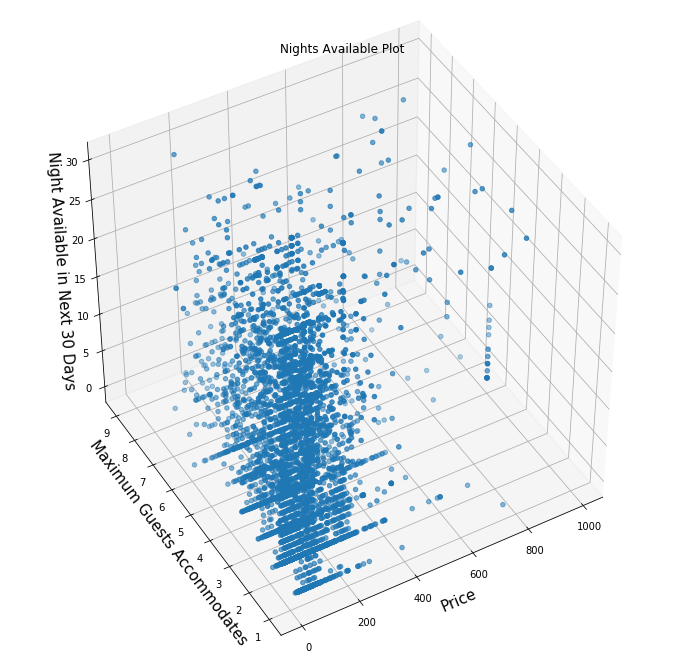

In [194]:
from mpl_toolkits.mplot3d import Axes3D
df_temp_plot = pd.concat([df_select_X['price'], 
                          df_select_X['accommodates'], 
                          df_select_Y['availability_30']], axis=1)
df_temp_plot = df_temp_plot.loc[df_temp_plot['price']<1000]
df_temp_plot = df_temp_plot.loc[df_temp_plot['accommodates']<10]
fig1 = plt.figure(figsize=(12, 12))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(df_temp_plot['price'], df_temp_plot['accommodates'], df_temp_plot['availability_30'])
ax1.set_xlabel('Price', fontsize=15, rotation=20)
ax1.set_ylabel('Maximum Guests Accommodates', fontsize=15, rotation=-60)
ax1.set_zlabel('Night Available in Next 30 Days', fontsize=15)
ax1.view_init(45, 240)
plt.title('Nights Available Plot')
plt.show()

### Categorical 

For Categorical values we will use a box plot to better understand data distribution between groups.

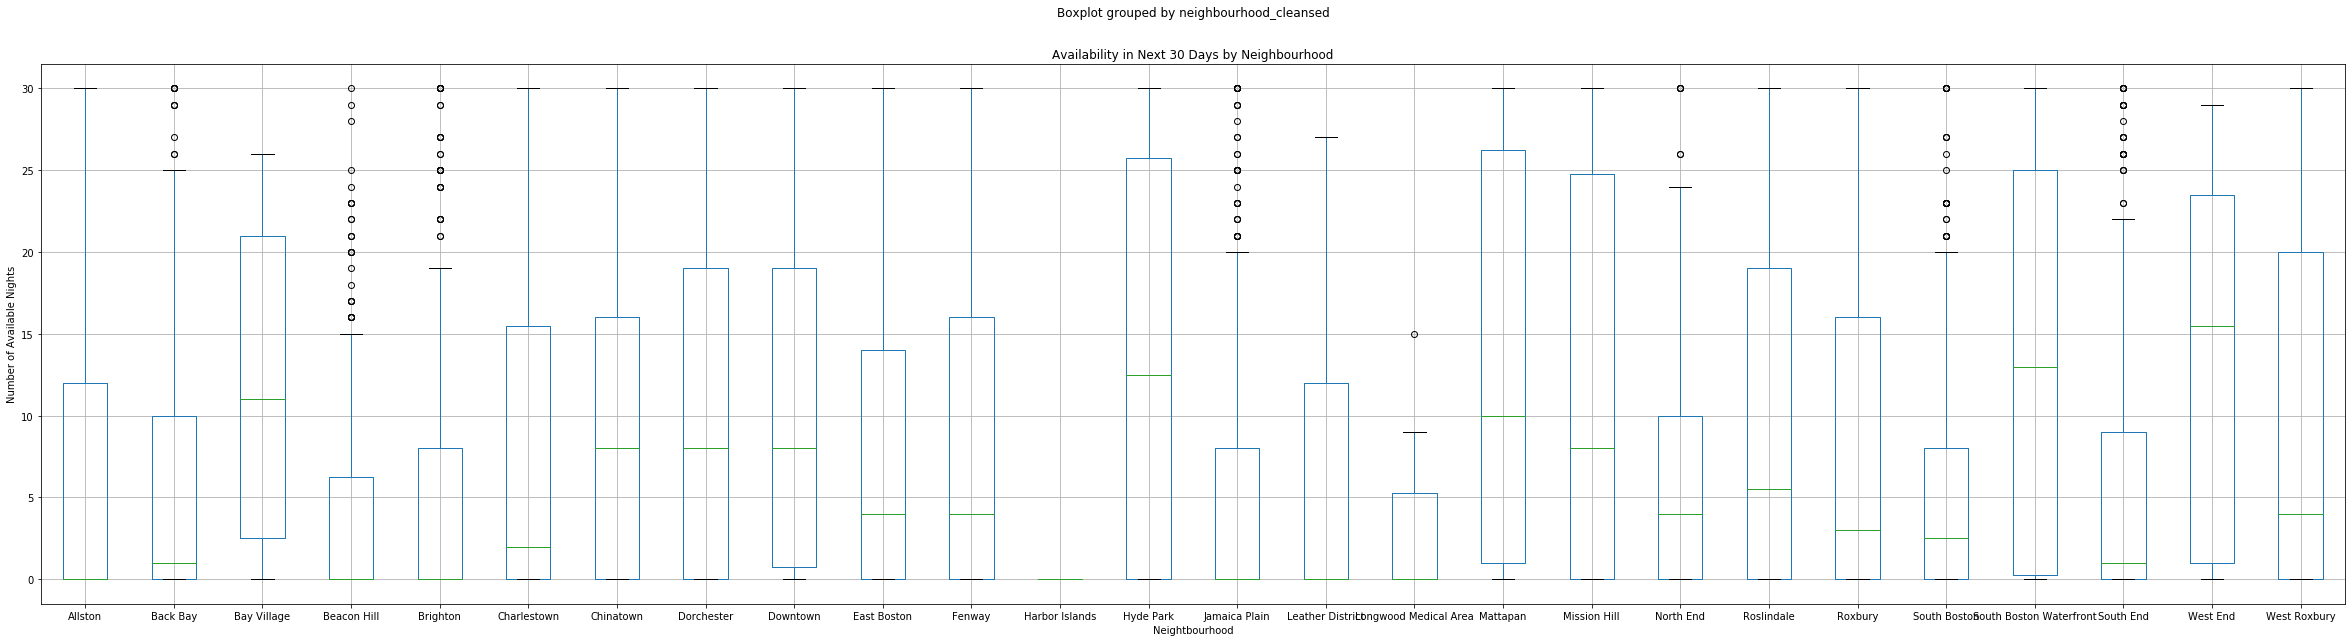

In [195]:


ax = df.boxplot(column='availability_30', by='neighbourhood_cleansed', figsize=(40, 10))
plt.xlabel('Neightbourhood')
plt.ylabel('Number of Available Nights')
plt.title('Availability in Next 30 Days by Neighbourhood')

plt.show()

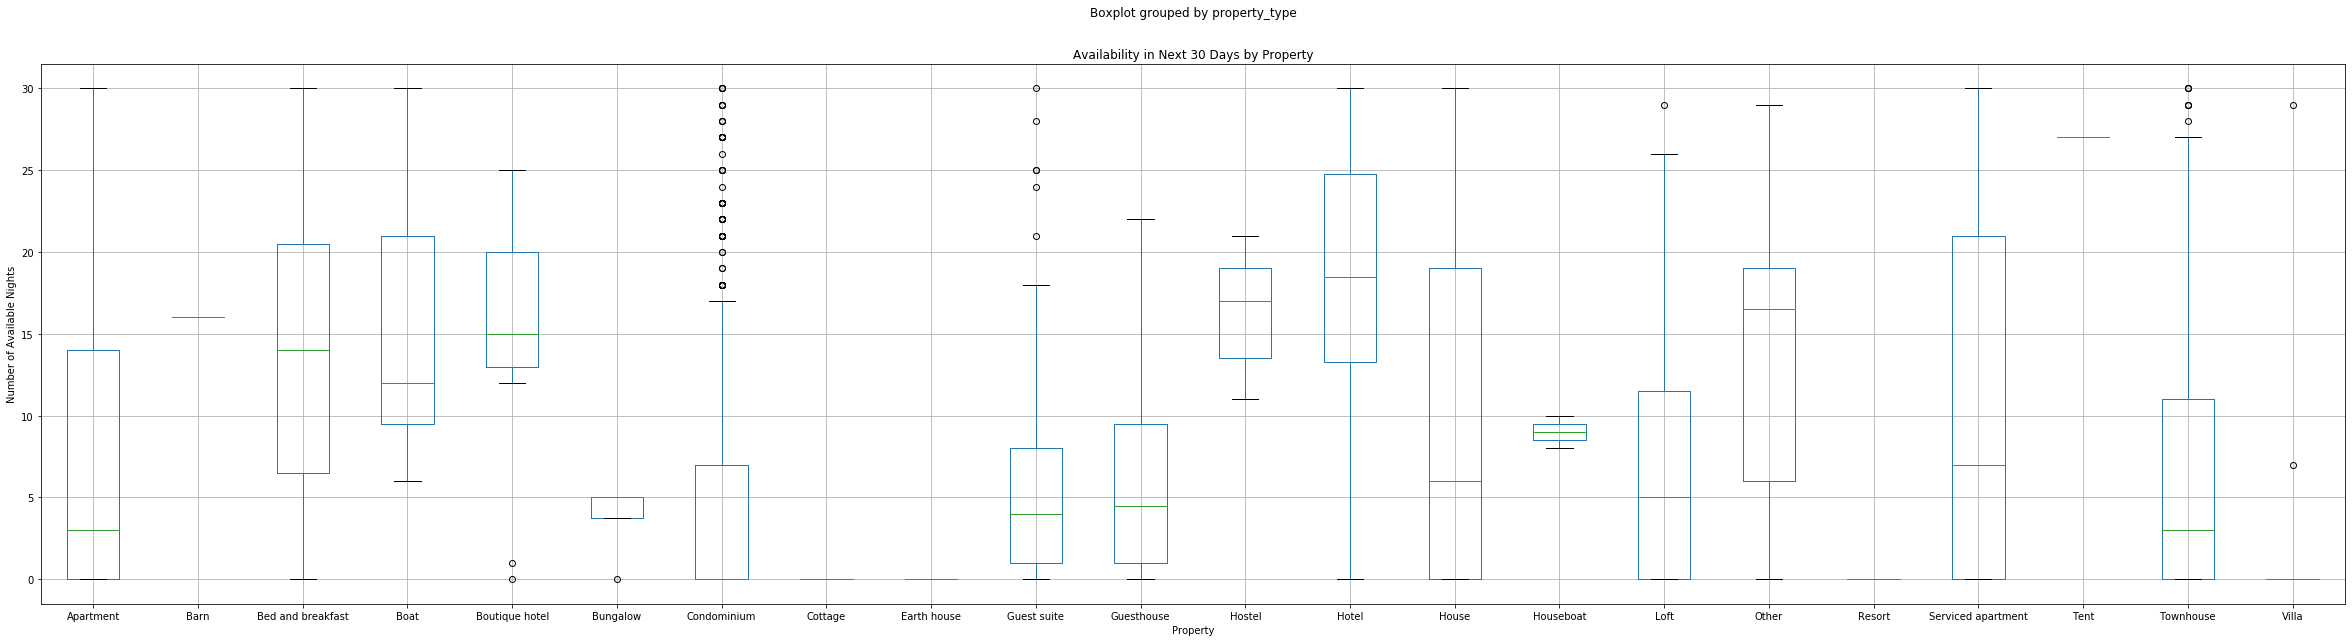

In [196]:
ax = df.boxplot(column='availability_30', by='property_type', figsize=(40, 10))
plt.xlabel('Property')
plt.ylabel('Number of Available Nights')
plt.title('Availability in Next 30 Days by Property')

plt.show()

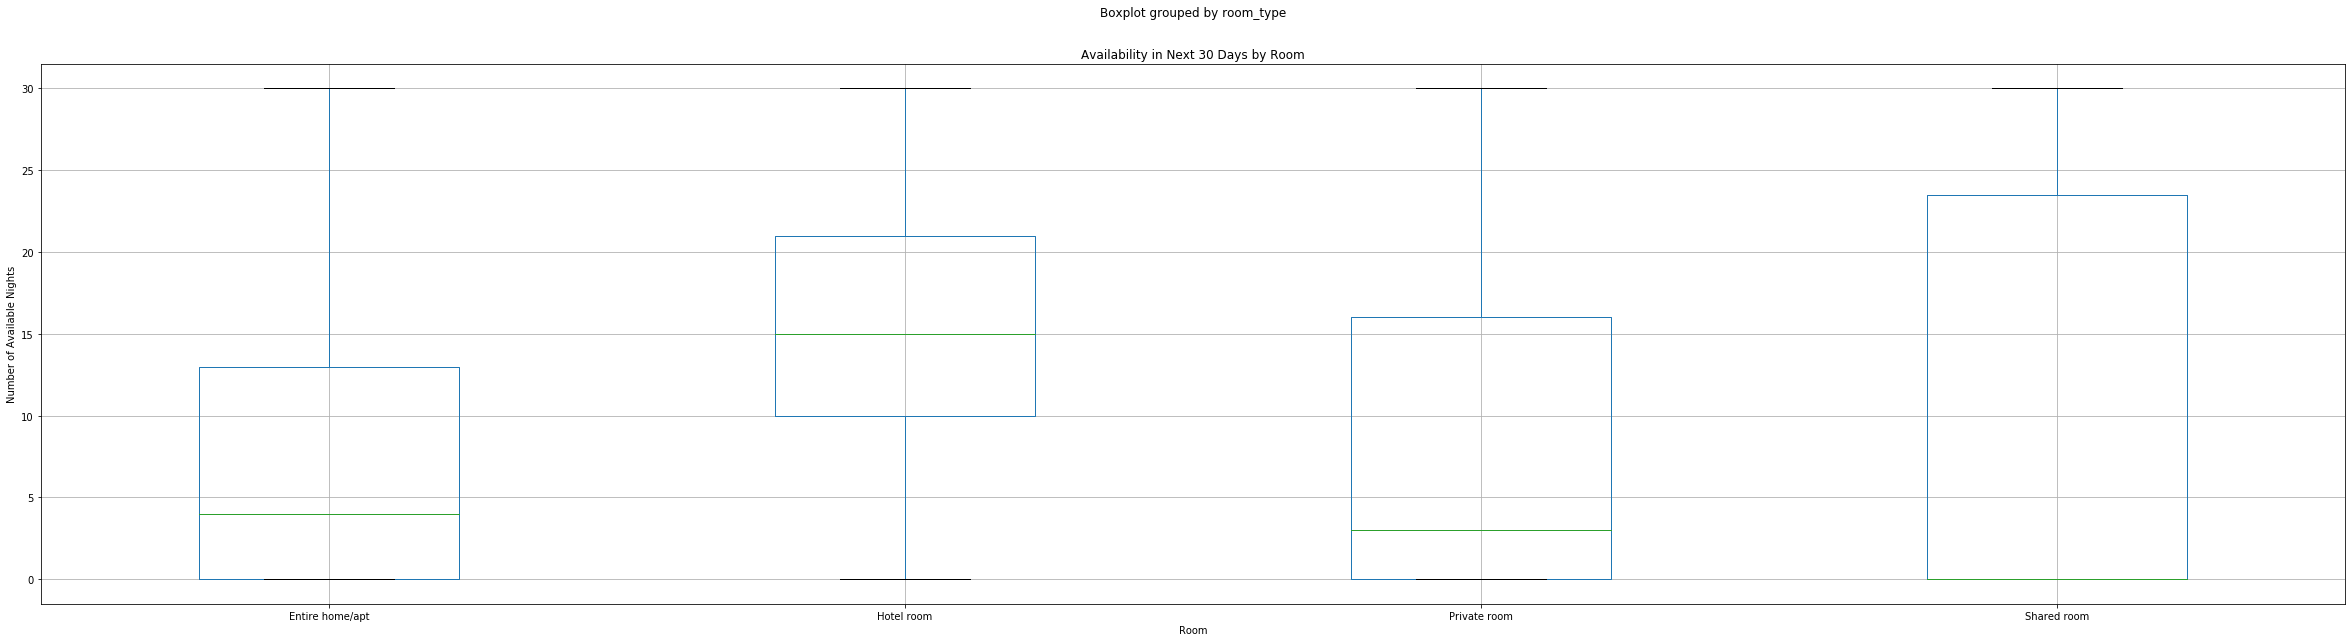

In [197]:
ax = df.boxplot(column='availability_30', by='room_type', figsize=(40, 10))
plt.xlabel('Room')
plt.ylabel('Number of Available Nights')
plt.title('Availability in Next 30 Days by Room')

plt.show()

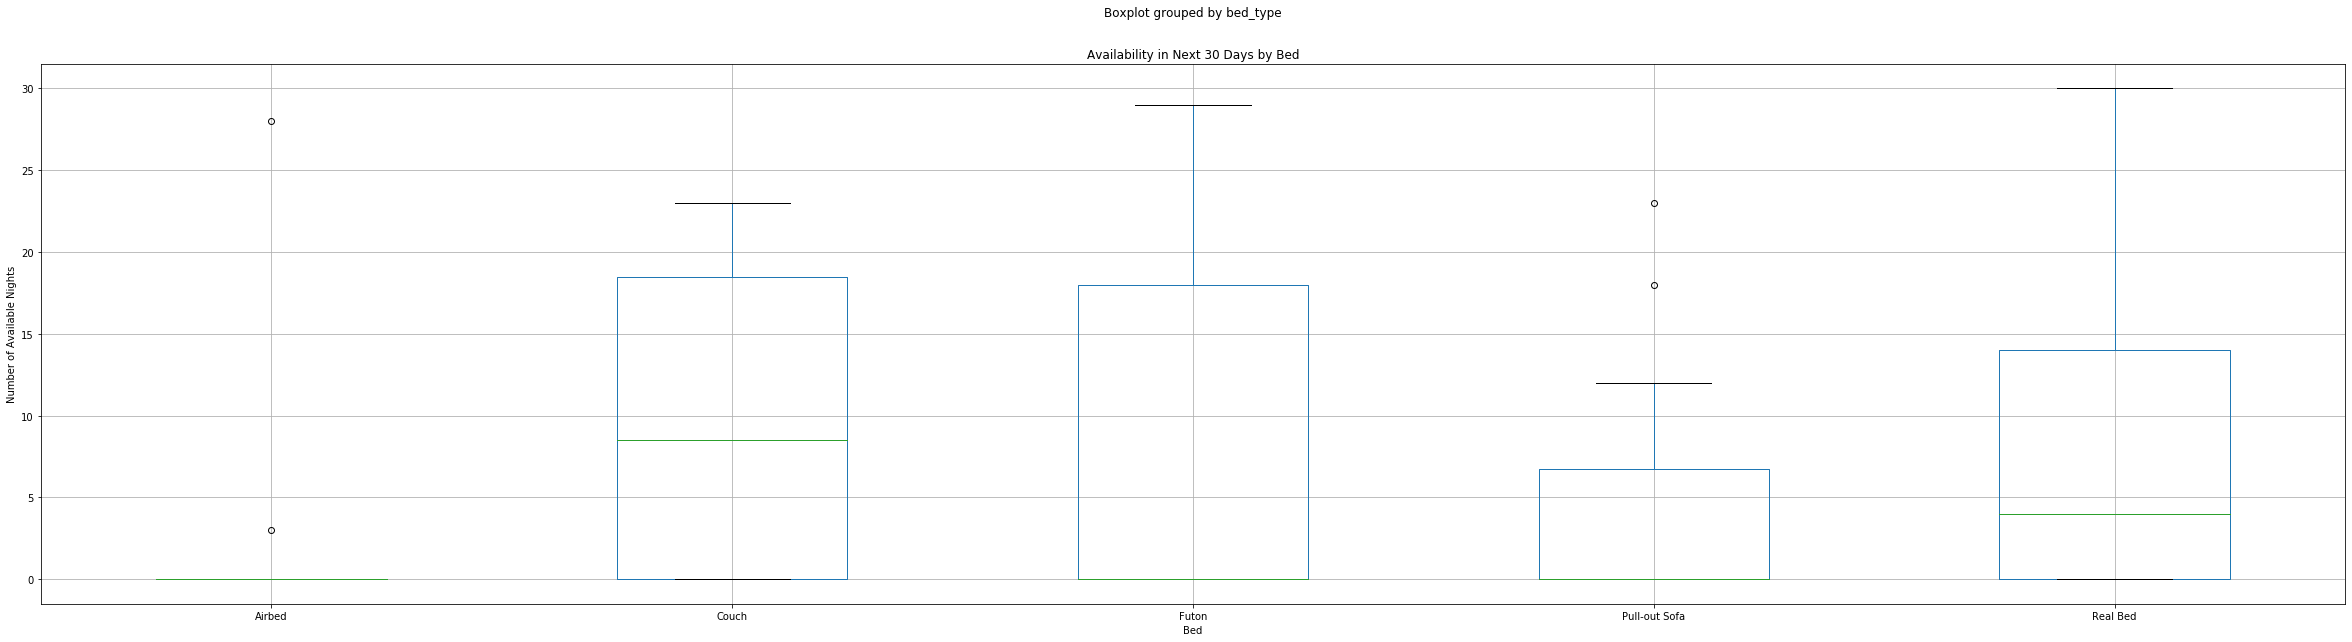

In [198]:
ax = df.boxplot(column='availability_30', by='bed_type', figsize=(40, 10))
plt.xlabel('Bed')
plt.ylabel('Number of Available Nights')
plt.title('Availability in Next 30 Days by Bed')

plt.show()

### Discrete

For the discrete variable, we used density histogram to dispaly the density of each category at different magnitude of target variable. 

Text(0.5, 0.98, 'plot for factor variables')

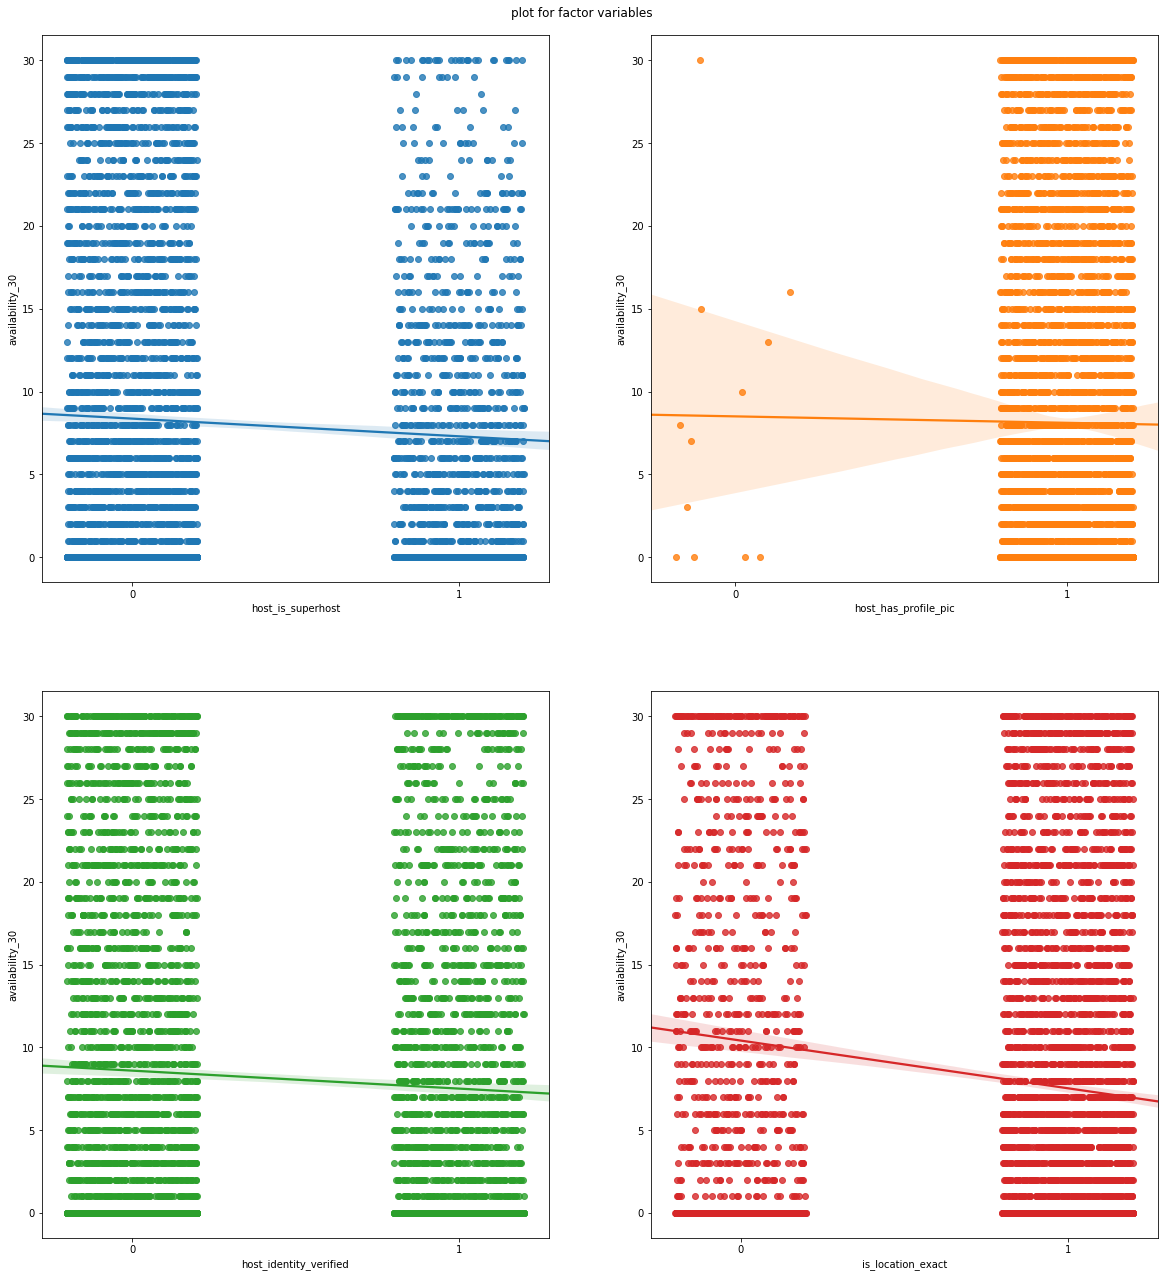

In [199]:
#discrete variable
dv =[ 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
       'is_location_exact']
df_temp_plot = pd.concat([df_select_X[dv], 
                          df_select_Y['availability_30']], axis=1)
fig1, axes = plt.subplots(2,2, figsize=(20,20))
for axe,fea in zip(axes.flat[0:],dv):
    x = df_select_X[fea]
    y = df_select_Y['availability_30']
    axe.set_xticks([0, 1])
    sns.regplot(x=fea, y="availability_30", data=df_temp_plot, x_jitter=.2, ax=axe)
plt.subplots_adjust(top=0.96)

fig1.suptitle('plot for factor variables')
#please wait for figure to display